In [1]:
import numpy as np
import pandas as pd
from skimage.data import imread
import matplotlib.pyplot as plt

import os

In [2]:
DATA_PATH = '/home/wentao/Development/data/ships_detection'
TRAIN_DIR = os.path.join(DATA_PATH, 'train')
TEST_DIR = os.path.join(DATA_PATH, 'test')
SAMPLE_CSV = os.path.join(DATA_PATH, 'sample_submission.csv')
MASKS_CSV = os.path.join(DATA_PATH, 'train_ship_segmentations.csv')

In [3]:
len(os.listdir(TRAIN_DIR))

104070

In [4]:
len(os.listdir(TEST_DIR))

88500

In [14]:
def rle_decode(mask_rle, shape=(768, 768)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= -1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi]=1
    
    return img.reshape(shape).T

In [15]:
masks_df = pd.read_csv(MASKS_CSV)
masks_df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
2,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
3,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
4,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...


In [16]:
image_id = '000155de5.jpg'
img = imread(os.path.join(TRAIN_DIR, image_id))
img_masks = masks_df.loc[masks_df['ImageId'] == image_id, 'EncodedPixels'].tolist()

In [17]:
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

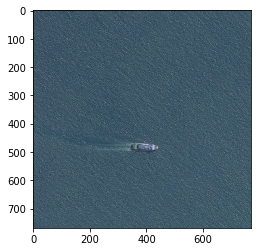

In [18]:
plt.imshow(img)

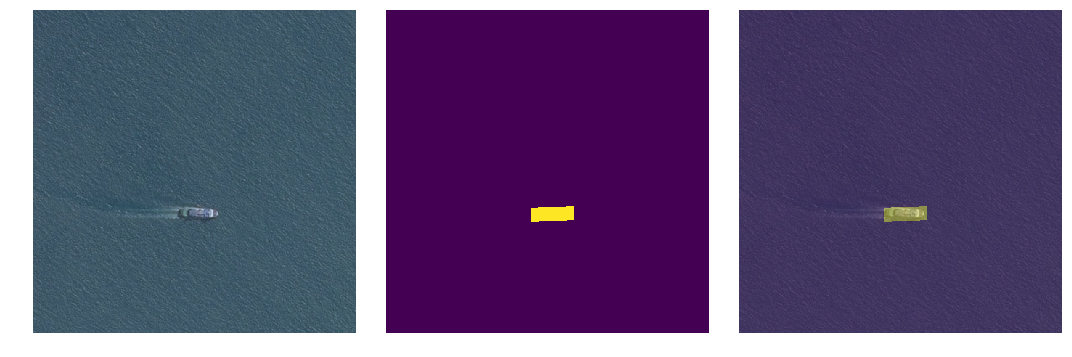

In [27]:
fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

In [22]:
all_masks.shape

(768, 768)